# Handin exercise for week 5: Pandas


## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [1]:
# Ex 5 A. What is the change in pct of divorced danes from 2008 to 2020?
import pandas as pd 
url1 = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2008K2%2C2008K3%2C2008K4%2C2020K1%2C2020K2%2C2020K3%2C2020K4&CIVILSTAND=F'
dst1 = pd.read_csv(url1, sep=";")

sumOf2008 = sum(list(dst1.iloc[0:4]['INDHOLD']))
sumOf2020 = sum(list(dst1.iloc[4:8]['INDHOLD']))

pot_diff = (sumOf2020 - sumOf2008)/sumOf2008

pot_diff


0.272806258451512

In [2]:
# Ex 5 B. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
# jeg har ikke frasorteret regioner og hele land. Men det er i bund og grund det samme, da "Hele landet" i dette
# tilfælder er den største "by" og jeg dermed har fundet den procentdel af ugifte der.
import pandas as pd 
url2 = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U&ALDER=IALT&Tid=2020*&OMR%C3%85DE=*'
dst2 = pd.read_csv(url2, sep=";")

url3 = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=TOT&ALDER=IALT&Tid=2020*&OMR%C3%85DE=*'
dst3 = pd.read_csv(url3, sep=";")

biggestCitysU = dst2.nlargest(20, ['INDHOLD'])
biggestCityA = dst3.nlargest(4,['INDHOLD'])

ugiftSum = sum((biggestCitysU.iloc[0:4]['INDHOLD'])/ 4)
allSum = sum((biggestCityA.iloc[:]['INDHOLD'])/ 4)

print(ugiftSum/allSum*100)





48.94415613442545


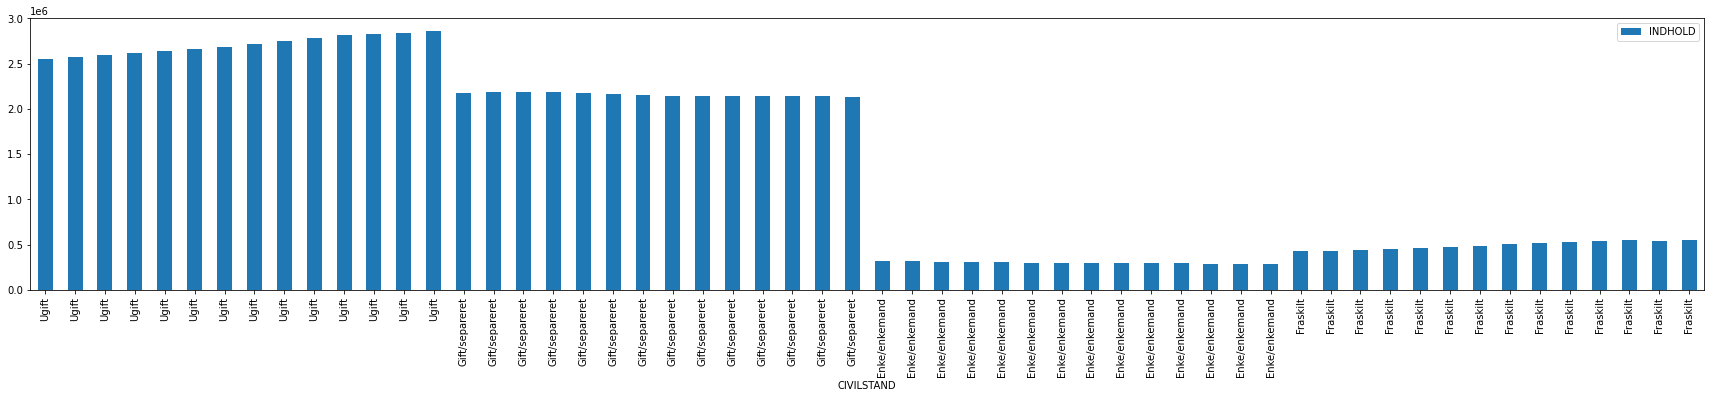

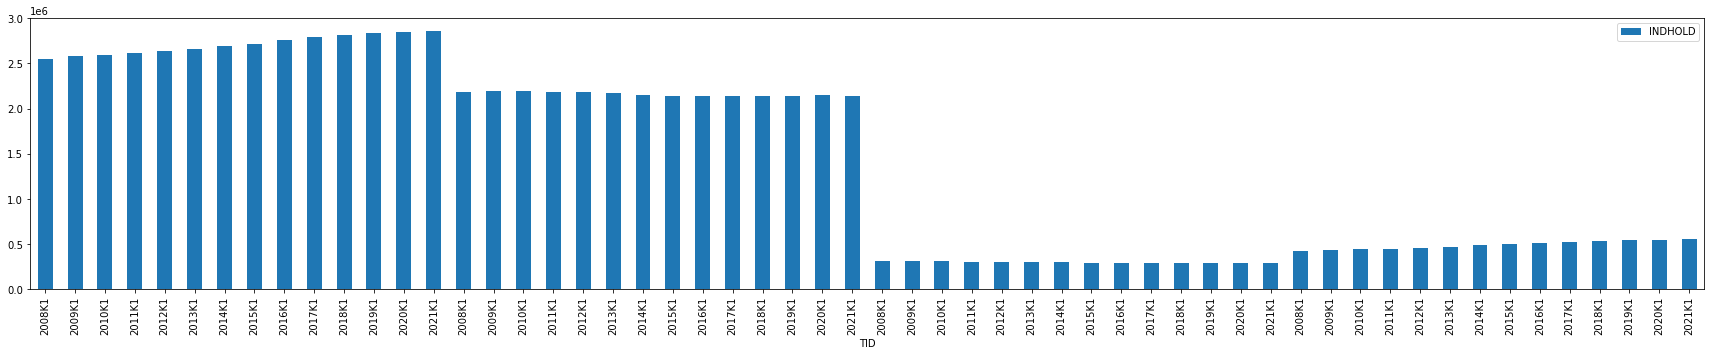

In [3]:
# Ex 5 C. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

import pandas as pd
import numpy as np

url4 = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG%2CE%2CF&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1'
dst3 = pd.read_csv(url4, sep=";")

dst3.plot.bar(figsize=(30,5), x = 'CIVILSTAND', y ='INDHOLD')
dst3.plot.bar(figsize=(30,5), x = 'TID', y ='INDHOLD')

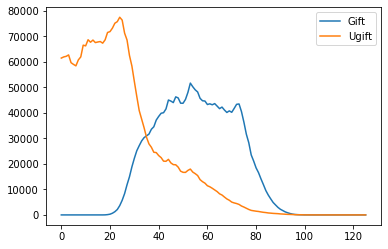

In [4]:
# Ex 5 D. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 
# (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
import matplotlib.pyplot as plt
url5 = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G&Tid=2020K1&ALDER=*"
dst4 = pd.read_csv(url5, sep=";")
url6 = "https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K1&ALDER=*&CIVILSTAND=U"
dst5 = pd.read_csv(url6, sep=";")

age_list = []
for x in range(126):
    age_list.append(x)
    
gift_list = list(dst4.iloc[1:]['INDHOLD'])
ugift_list = list(dst5.iloc[1:]['INDHOLD'])

plt.plot(age_list, gift_list, label="Gift")
plt.plot(age_list, ugift_list, label="Ugift")
plt.legend()